<img src="../../img/ml_theme.png">
## <center> Дополнительное профессиональное <br> образование НИУ ВШЭ </center>
#### <center>Программа "Практический анализ данных и машинное обучение" </center>
# <center>Diabetes DataSet from UCI</center>
<img align="center" src="https://habrastorage.org/files/8a9/b91/442/8a9b9144242c4323a147243e1a4c1a44.jpg" height=500   width=500>
### <center> Автор материала: Юлия Петропавловская </center>

## <font color='green'>Review. Часть 1</font>

-       описание набора данных и признаков (на понятном русском, желательно с картинками) - 1 балл

<font color='green'>1 балл. 
</font>

-       первичный анализ признаков  - 3 балла

<font color='green'>3 балла. <br> <br>
</font>

-       первичный визуальный анализ признаков  - 3 балла

<font color='green'>3 балла. <br> 
</font>

-       если пришли к каким-то "инсайтам", обнаружили закономерности - изложите  - 3 балла

<font color='green'>2 балла <br> В целом проведен хороший первоначальный анализ данных, но благодаря пропускам найдено не так много сильных признаков. </font>

## <font color='green'>Итого: 9 баллов (округл.)</font>

## <center> Индивидуальный проект по анализу данных </center>

**План исследования**
 - Описание набора данных и признаков
 - Первичный анализ признаков
 - Первичный визуальный анализ признаков
 - Закономерности, "инсайты", особенности данных
 - Предобработка данных
 - Построение признаков
 - Отбор признаков
 - Построение модели
 - Кросс-валидация, подбор параметров
 - Кривые валидации и обучения
 - Прогноз для тестовой (или отложенной) выборки
 - Оценка модели с описанием выбранной метрики
 - Выводы

In [3]:
from __future__ import division, print_function
# отключим всякие предупреждения Anaconda
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%pylab inline
import seaborn as sns
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [4]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

### Скачиваем данные

[Ссылка на данные](http://archive.ics.uci.edu/ml/datasets/Diabetes+130-US+hospitals+for+years+1999-2008)

In [5]:
data = pd.read_csv('/Users/juliap/Desktop/dataset_diabetes/diabetic_data.csv')

Коротко о данных: в датасете 100К наблюдений и 50 признаков, характеризующих пациента попавшего в больницу и имеющего заболевание [диабет](https://en.wikipedia.org/wiki/Diabetes_mellitus), а также его состояние после выписывания из больницы. Все пациенты оставались в больнице не менее одного дня, во время их прибывания в больнице проводились лабораторные исследования и назначались медикаменты
Датасет собирали на протяюении 10 лет по данным 130 больниц в US

###  Часть 1. Описание набора данных и признаков

In [124]:
data.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Перейдем к описанию переменных

1. Encounter ID численная переменная, характеризующая ID больницы 

2. Patient number численная переменая, описывающая уникальный номер пациента

3. Race номинальная переменная, описывающая расу к которой принадлежит пациент

4. Gender так же номинальня переменна, помимо "female" "male" имеет третье состояние "unknown/invalid", присвоенное если пол не был указан

5. Age номинальная переменная с групированные в интервали по 10 лет: [0, 10), [10, 20), …, [90, 100)

6. Weight вес пациента в численном виде, но, к сожалению, более 95% пропущенные значения, хотя при диабете этот фактор достаточно весом с медицинской точки зрения

7. Admission type номинальная переменная имеет 8 категории, отражающих состояние поступления пациента:
  - Emergency пациенту требуется скорая помощь, есть угроза жизни (аналог нашей реанимации)
  - Urgent пациенту требуетя скорая помощь, но его состояние стабильное 
  - Elective в дальнейшем потребуется лечеие или операция, но это не так срочно, жизни не угрожает
  - Newborn новорожденный
  - Not Available, NULL, Not Mapped  для нас это все N/A
  - Trauma Center поступил через травмпункт
  
8. Discharge disposition также номинальная переменная, имеет 29 значений и описывает, что произошло с пациентом после выписки из больницы
  - Discharged to home отправлен домой в удовлетворительном состояние
  - Discharged/transferred to another short term hospital переведен в другую больницу на короткий срок
  - Discharged/transferred to SNF (skilled nursing facilities) переведен в центр специального ухода 
  - Discharged/transferred to ICF (intermediate Care Facilities)
  - Discharged/transferred to another type of inpatient care institution переведен в другой стационар
  - Discharged/transferred to home with home health service выписан домой и требует самостоятельного лечения дома
  - Left AMA (American Medical Association)
  - Discharged/transferred to home under care of Home IV provider выписан домой и требует особое лечение дома
  - Admitted as an inpatient to this hospital переведен из амбулаторного лечения в стационар в этой же больнице
  - Neonate discharged to another hospital for neonatal aftercare новорожденный ребенок (возраст меньше 1 месяца) переведен в учернеждение по уходу за новопожденнымм
  - Expired пациент умер
  - Still patient or expected to return for outpatient services все еще болен или умер после переведения в амбулаторное лечение
  - Hospice / home переведен в  хоспис или домой, пациент неизлечимо болен 
  - Hospice / medical facility переведен в хоспис или в другие медицинские учреждения, пациент неизлечимо болен
  - Discharged/transferred within this institution to Medicare approved swing bed
  - Discharged/transferred/referred another institution for outpatient services переведен в другое место для амбулаторного лечения
  - Discharged/transferred/referred to this institution for outpatient services переведен в рамках этой больницы из стационара на амбулаторное лечение
  - Expired at home. Medicaid only, hospice. умер дома
  - Expired in a medical facility. Medicaid only, hospice. умер в больнице
  - Expired, place unknown. Medicaid only, hospice. умер неизвестно где
  - Discharged/transferred to another rehab fac including rehab units of a hospital. переведен в востановительное учреждение (аналог санатория в Росссии)
  - Discharged/transferred to a long term care hospital. Перведен в больницу для длительного восстанавления
  - Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare. переведен в центр по уходу не при больнице
  - Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere перведен в любое другое место за исключением вышеназванных
  - Discharged/transferred to a federal health care facility. переведен в государственное учреждение по уходу
  - Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital переведен в психиатрическое учреждение
  - Discharged/transferred to a Critical Access Hospital (CAH)
  - Not Available, NULL, Not Mapped для нас это N/A
  
9. Admission source по аналогии с предыдущей фичей является номинальной и описывает место из которого поступил пациент

  1  Physician Referral направлен врвчем общей практки (наш терапевт)
  
  2  Clinic Referral направлен медицинским учреждением
  
  3  HMO Referral (health maintenance organization) направлен по страховке
  
  4  Transfer from a hospital переведен из больнице
  
  5  Transfer from a Skilled Nursing Facility (SNF) направлен из центра по специализированному уходу
  
  6  Transfer from another health care facility направлен и здругого учреждения по уходу за здоровьем
  
  7  Emergency Room направлен из приемного покоя по скорой 
  
  8  Court/Law Enforcement направлен по решению суда
  
  10 Transfer from critial access hospital направлен из больницы с особым режимом ()
  
  11 Normal Delivery обратился сам
  
  12 Premature Delivery 
  
  13 Sick Baby больной ребенок
  
  14 Extramural Birth 
  
  18 Transfer From Another Home Health Agency 
  
  19 Readmission to Same Home Health Agency 
  
  22 Transfer from hospital inpt/same fac result in a sep claim перведен из больнице
  
  23 Born inside this hospital рожден в этой больнице
  
  24 Born outside this hospital рожден вне этой больнице
  
  25 Transfer from Ambulatory Surgery Center переведен из операциооного центра
  
  26 Transfer from Hospice переведен из хосписа
  
  9,15,17,20 Not Available, NULL,  Not Mapped для нас это N/A
  
10. Time in hospital численная переменная отвечающая за время проведеное в борльнице в днях (разница между датой поступления и выписки)
11. Payer code номинальная переменная отвечающая за то кто оплачив лечения пациента, имеет 23 значения
12. Medical specialty номинальная переменная имеет 84 значения и характеризует отделение в которое попал пациент
13. Number of lab procedures  численная переменная, описывающая числу лабораторных тестов, проведенных пациенту
14. Number of procedures число процедур (не лабораторных исследований) проведенных человеку во время пребывания в больнице
15. Number of medications число препаратов назначенных во время пребывания в больнице
16. Number of outpatient visits число визитов для амбулаторной помощи в течение года до поступления в больницу
17. Number of emergency visits число поступлений в больницу по скорой помощи за год до поступления в больницу
18. Number of inpatient visits число поступлений в стационар за год до текущего поступления
19. Diagnosis 1 номинальная переменная, имеет 848 категорий и обозначает первичный диагноз пациента
20. Diagnosis 2 номинальная переменная (923 категории) отвечает за вторичный диагноз
21. Diagnosis 3 номинальная переменная (954 категории) вторичный уточненный диагноз
22. Number of diagnoses численная переменная обозначает число диагнозов(различных) поставленных пациенту
23. Glucose serum test result тест на уровень глюкозы в крови. Переменнвя номинальная с 4-мя категориями: “>200,” “>300,” “normal,” и “none”
24. A1c test result - . Номинальная переменая с 4-мя значениями: “>8”, “>7”, “normal” и “none”
25. Change of medications номинальная переменная указывает изменялись ли назначенные медикаменты или нет
26. Diabetes medications номинальная переменная указывает принамал ли пациент диабетические лекарство или нет 

27-53. Названия диабетических лекарств в виде номинальных переменных с категориями: “up” если доза была увеличена, “down” если доза уменьшилась, “steady” если не менялась и “no”  если не принималось лекарство

54 Readmitted - повторное поступление в стационар. Номинальная переменная с 3-мя категориями “<"30 поступил повторно менее чем через 30 дней, “>"30 - более чем через 30 дней, “No” - не пуступал или нет записи про это 


###  Первичный визуальный анализ признаков + инсайты 

Для первичного анализа выкинем колонки с названиями медикаментов, а так же ID пользователя и больницы, в дальнейшем для модели я верну названия медикаментов, но в ином виде

In [50]:
data2 = data.drop(['encounter_id', 'patient_nbr','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'],axis = 1)

Для первичного анализа воспользуемся методом discribe и посмотри основные характеристики 

In [93]:
data2.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
race,101766,6,Caucasian,76099,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,101766,3,Female,54708,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,101766,10,[70-80),26068,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,101766,10,?,98569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
admission_type_id,101766,NaN,NaN,NaN,2.02401,1.4454,1,1,1,3,8
discharge_disposition_id,101766,NaN,NaN,NaN,3.71564,5.28017,1,1,1,4,28
admission_source_id,101766,NaN,NaN,NaN,5.75444,4.06408,1,1,7,7,25
time_in_hospital,101766,NaN,NaN,NaN,4.39599,2.98511,1,2,4,6,14
payer_code,101766,18,?,40256,NaN,NaN,NaN,NaN,NaN,NaN,NaN
medical_specialty,101766,73,?,49949,NaN,NaN,NaN,NaN,NaN,NaN,NaN


особой информации это не дает из-за пропусков в данных, пожтому смотреть на данные я буду при помощи визуализации

В статье рассматривали влияние результата теста A1C на readmittion, попробуем пойти дальше и посмотреть как другие признаки влияют на фактор readmitted

Посмотрим на признак readmitted, который в дальнейшем будем предсказывать. Как можно заметить пациентов, которые возвращаются в первые 30 дней достаточно мало, они составляют лишь 10% выборки и с этим в дальнейшем могут быть проблемы при предсказывании 
Так же достаточно много наблюдений "NO", не исключено, что для анализа я объединю больше и меньше 30 дней

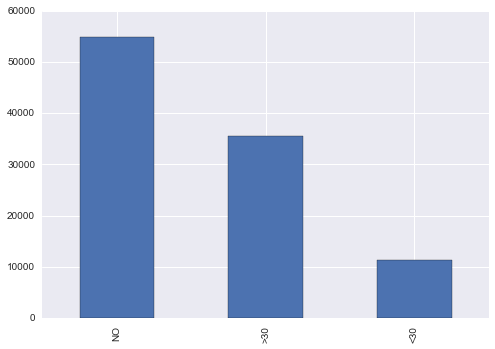

In [120]:
data2['readmitted'].value_counts().plot(kind = 'bar')
plt.show()

А теперь посмотри как распределены пациенты по возрасту, не удивительно, что в основном это пожилые люди

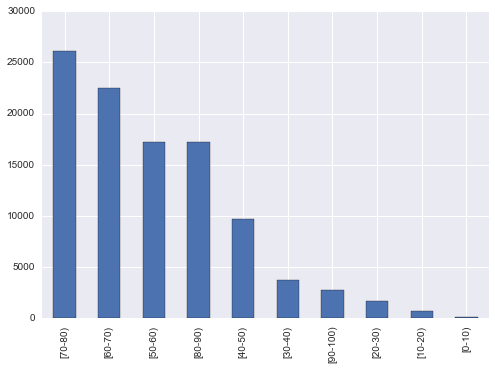

In [126]:
data2.age.value_counts().plot(kind = 'bar')
plt.show()

Посмотрим на переменную discharge_disposition_id() в зависимости от того когда пациент обратился

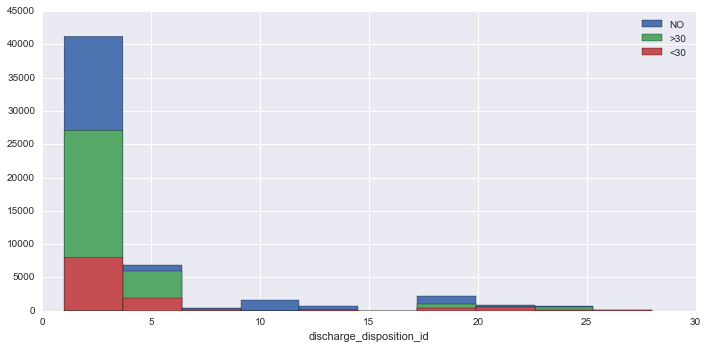

In [94]:
g = sns.FacetGrid(data2[['discharge_disposition_id','readmitted']], hue="readmitted", size=5, aspect=2)
g.map(plt.hist, "discharge_disposition_id", histtype='barstacked', stacked=True);
plt.legend();

Для всех трех параметров польшая часть пациентов после больницы отправляется домой или в специальные медицинские учреждения по уходу, это категории 1(Discharged to home), 3(Discharged/transferred to Skilled Nursing Facility (SNF)).

Одна из категорий под номером 11 характерна для "NO" и это категория "Expired", что не удивительно

Для категории 'больше/меньше 30' характерны признаки 5(Discharged/transferred to another type of inpatient care institution); 6(Discharged/transferred to home with home health service);
28 "Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital", это так же не удивительно, так как пациент выписывается не являясь полность здоровым и продолжает лечение

К сожалению наблюдений с поступление в первые 30 дней достаточно мало чтобы в дальнейшем оставлять это как отдельную категорию, при слияние можно выделить признаки которые характерны для группы 'больше/меньше 30', если этого не делать, то "NO" забивает все

Теперь посмотрим взаимосвязь результатов теста A1C и то когда пациент обратился вновь, именно это было целью изначального исследования по этим данным

Сразу можем заметить большое количество пропусков в данные, и скорее всего придется выкинуть их, так как для восстанавления их слишком много

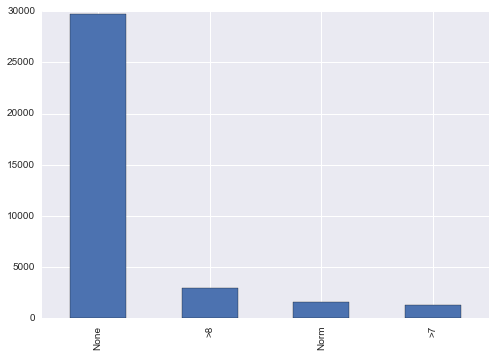

In [104]:
data2[data2['readmitted']=='>30']['A1Cresult'].value_counts().plot(kind = 'bar')

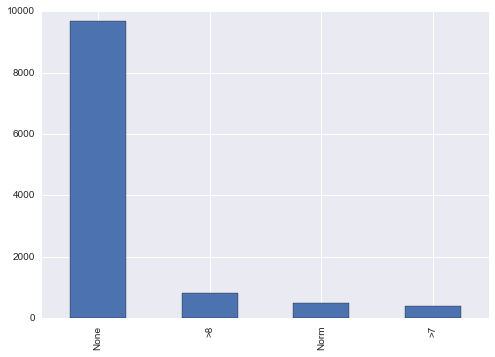

In [105]:
data2[data2['readmitted']=='<30']['A1Cresult'].value_counts().plot(kind = 'bar')

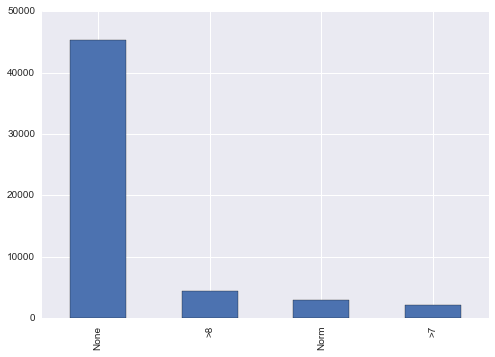

In [106]:
data2[data2['readmitted']=='NO']['A1Cresult'].value_counts().plot(kind = 'bar')

можно увидеть, что для NO явно выделяется категория Norm, так как значительная часть пациентов из NO выписываются домой в хорошем сотояние, в остальных категориях таких различий нет

Теперь посмотрим, как влияет количество медикаментов прописанных во время лечения на readmitted

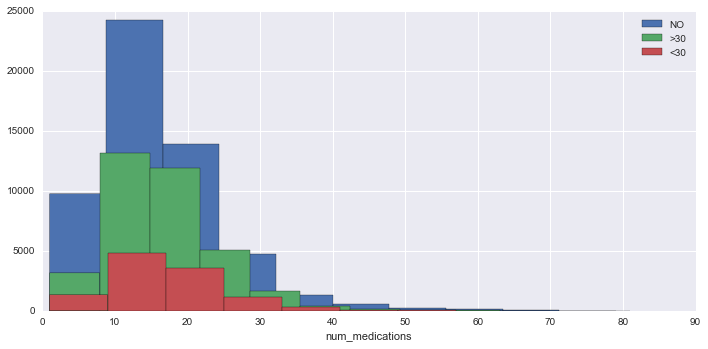

In [107]:
g = sns.FacetGrid(data2[['num_medications','readmitted']], hue="readmitted", size=5, aspect=2)
g.map(plt.hist, "num_medications", histtype='barstacked', stacked=True);
plt.legend();

Можно увидеть что вправо (в сторону с большим количеством лекарств) смещены пациенты NO, связано это с тем, что в эту категорию попадают тяжелобольные люди и те кто после выписки умер, логично предположить, что во время лечения они принимали больше лекарств

А теперь посмотрим как люди посещали больницу до того как попасть в нее в этот раз, а именно сколько раз они ложились в стационар и лечились амбулаторно в течении года

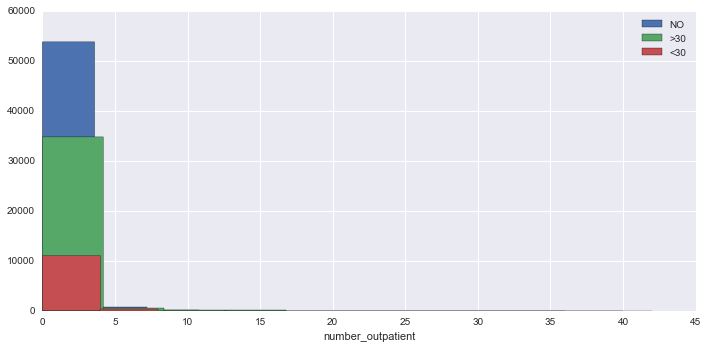

In [108]:
g = sns.FacetGrid(data2[['number_outpatient','readmitted']], hue="readmitted", size=5, aspect=2)
g.map(plt.hist, "number_outpatient", histtype='barstacked', stacked=True);
plt.legend();

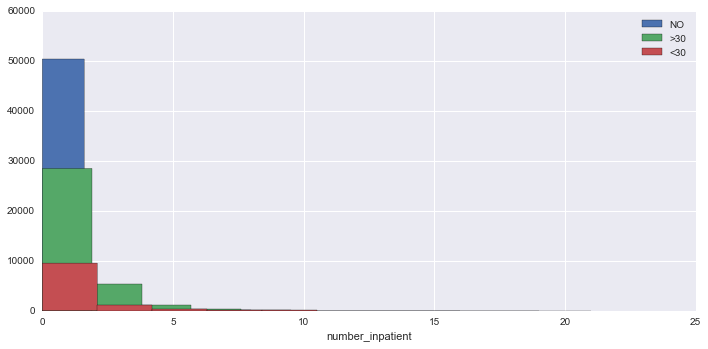

In [122]:
g = sns.FacetGrid(data2[['number_inpatient','readmitted']], hue="readmitted", size=5, aspect=2)
g.map(plt.hist, "number_inpatient", histtype='barstacked', stacked=True);
plt.legend();

Получаем достаточно логичный результат: люди, которые чаще посещали больницу (амбулаторно) в течении года, обратятся за помощью вновь не раньше 30 дней, максимальное число обращений за помощью в стационаре приходится на тех, кто вернется в течении 30 дней, что также понятно, так как скорее всего у них хронические заболевания, требующие постоянного контроля

Теперь посмотрим на число обращений по скорой

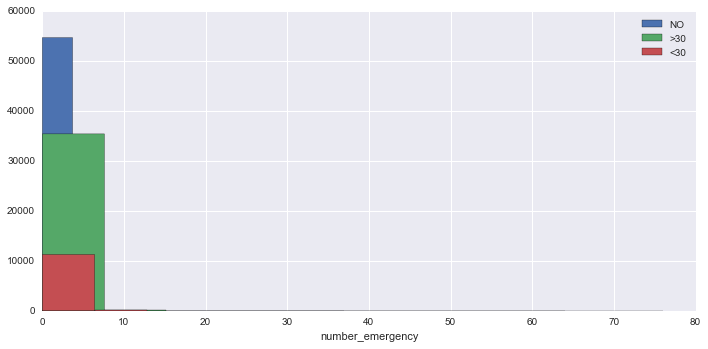

In [110]:
g = sns.FacetGrid(data2[['number_emergency','readmitted']], hue="readmitted", size=5, aspect=2)
g.map(plt.hist, "number_emergency", histtype='barstacked', stacked=True);
plt.legend();

Получаем, что больше всего пациентов, поступивших по скорой, возвращаются в больницу не раньше 30 дней, так происходит потому что переменная по скорой помощи не включает в себя реанимацию, следовательно, люди у которых есть проблемы со здоровьем и может даже хронические и их быстро решают, приходят в стабильное состояние и возвращается обратно не скоро 

По числу диагнозов все достаточно скучно и все категории распеделены одинаково, кроме выброса в 16 диагнозов для категории NO, опять же это связано с тем, что в эту категории входят люди, умершие после выписки из больницы

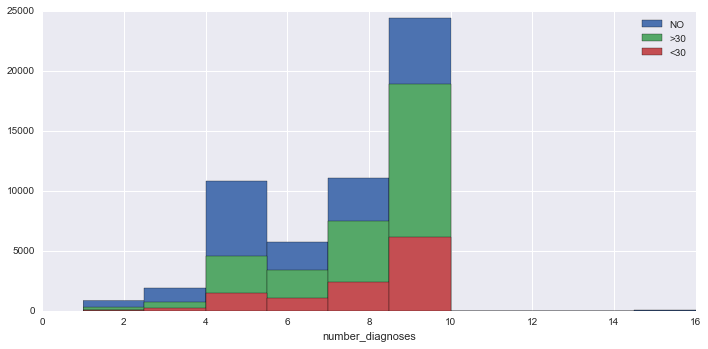

In [111]:
g = sns.FacetGrid(data2[['number_diagnoses','readmitted']], hue="readmitted", size=5, aspect=2)
g.map(plt.hist, "number_diagnoses", histtype='barstacked', stacked=True);
plt.legend();

Если посмотреть на число проведенных лабораторных исследований, можно увидеть, что:
до 90 исследований люди, вырнувшиеся не раньше чем через 30 дней, операжают по числу лабораторных исследований группу NO, после 90 происходит на оборот все и связано это с тем, что в категорию NO относятся очень больные люди, которых лечить бесполезно и они сдвигают вправо эту группу

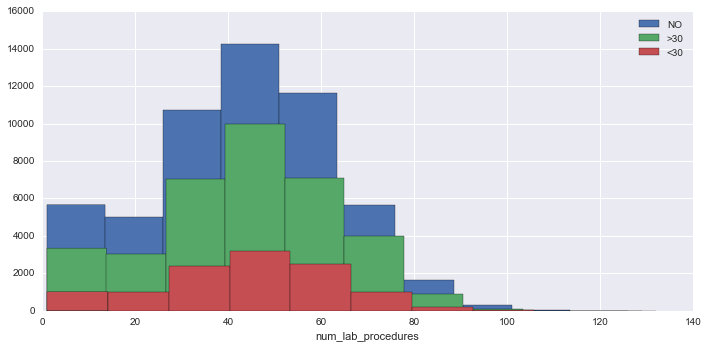

In [112]:
g = sns.FacetGrid(data2[['num_lab_procedures','readmitted']], hue="readmitted", size=5, aspect=2)
g.map(plt.hist, "num_lab_procedures", histtype='barstacked', stacked=True);
plt.legend();

Посмотрим на корреляцию численных признаков, у меня их не так много

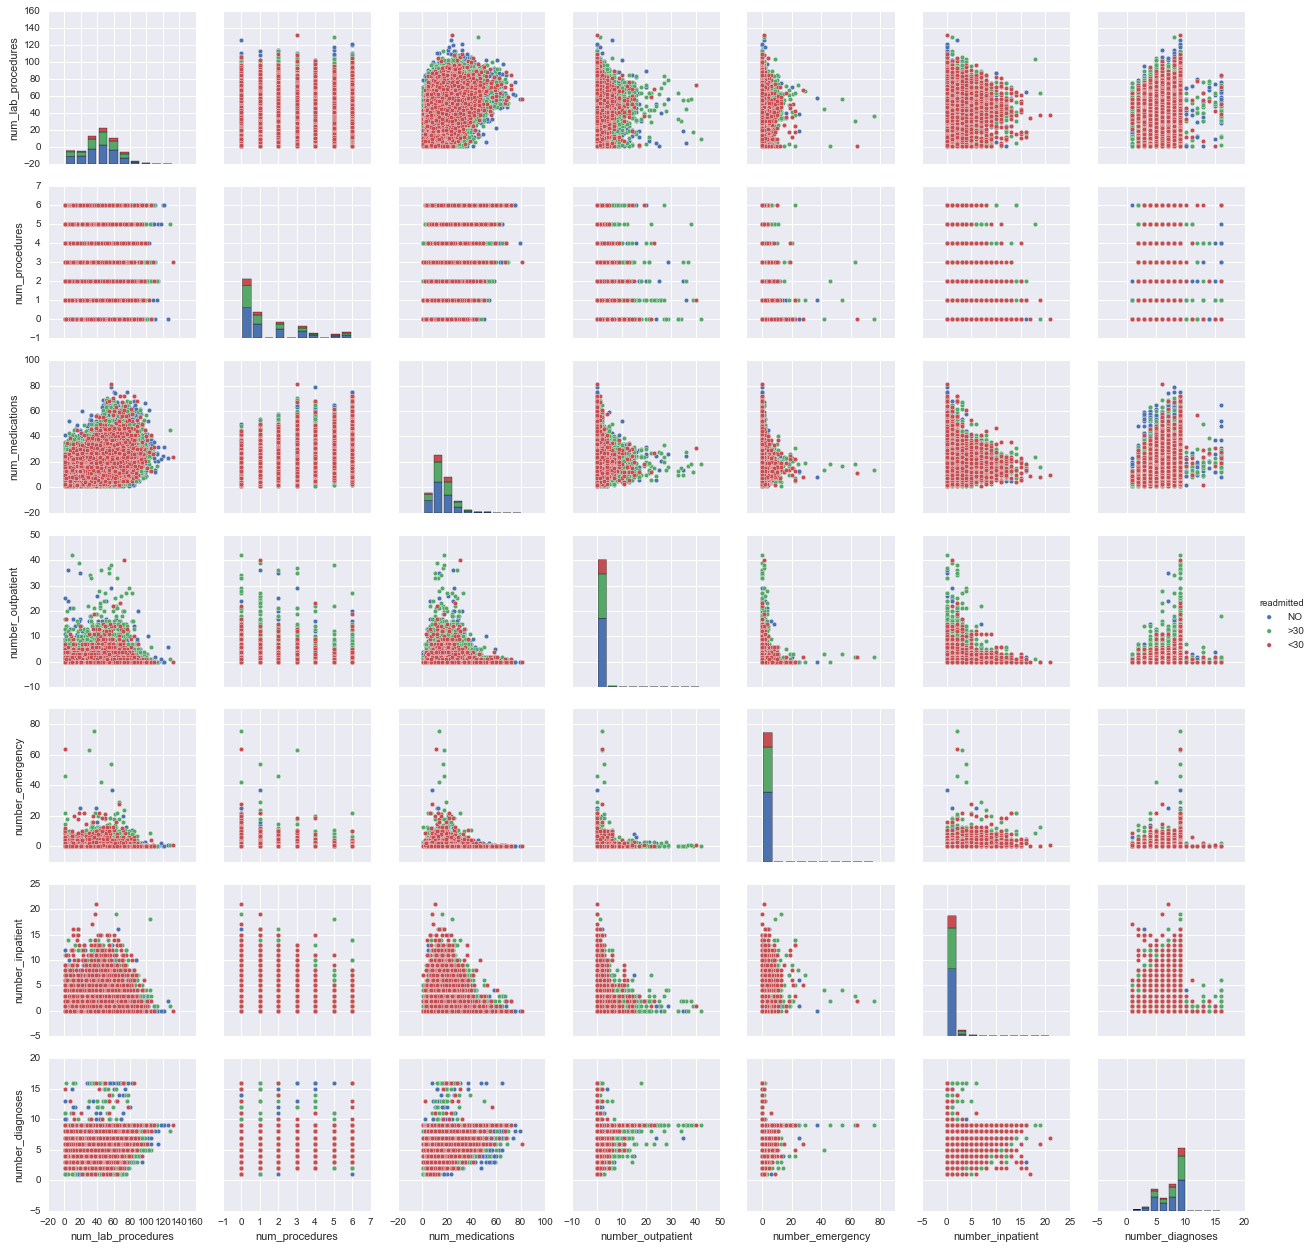

In [129]:
sns.pairplot(data2[['num_lab_procedures','num_procedures','num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','number_diagnoses','readmitted']],hue='readmitted')

Можно увидеть следующие взаимосвязи:

    1) при росте госпитализаций в стационар ратет число лабораторных исследований 
    
    2) при росте лабораторных исследований растет число прописанных лекарств
    
    3) при росте диагнозоа так же растет число медикаментов
    
    4) при росте диагнозов растет число лабораторных исследований
    
Что ж, данные результаты не удивительны и достаточно логичны

Еще любопытно посмотреть как эти численные переменные распределены по результатам теста A1C

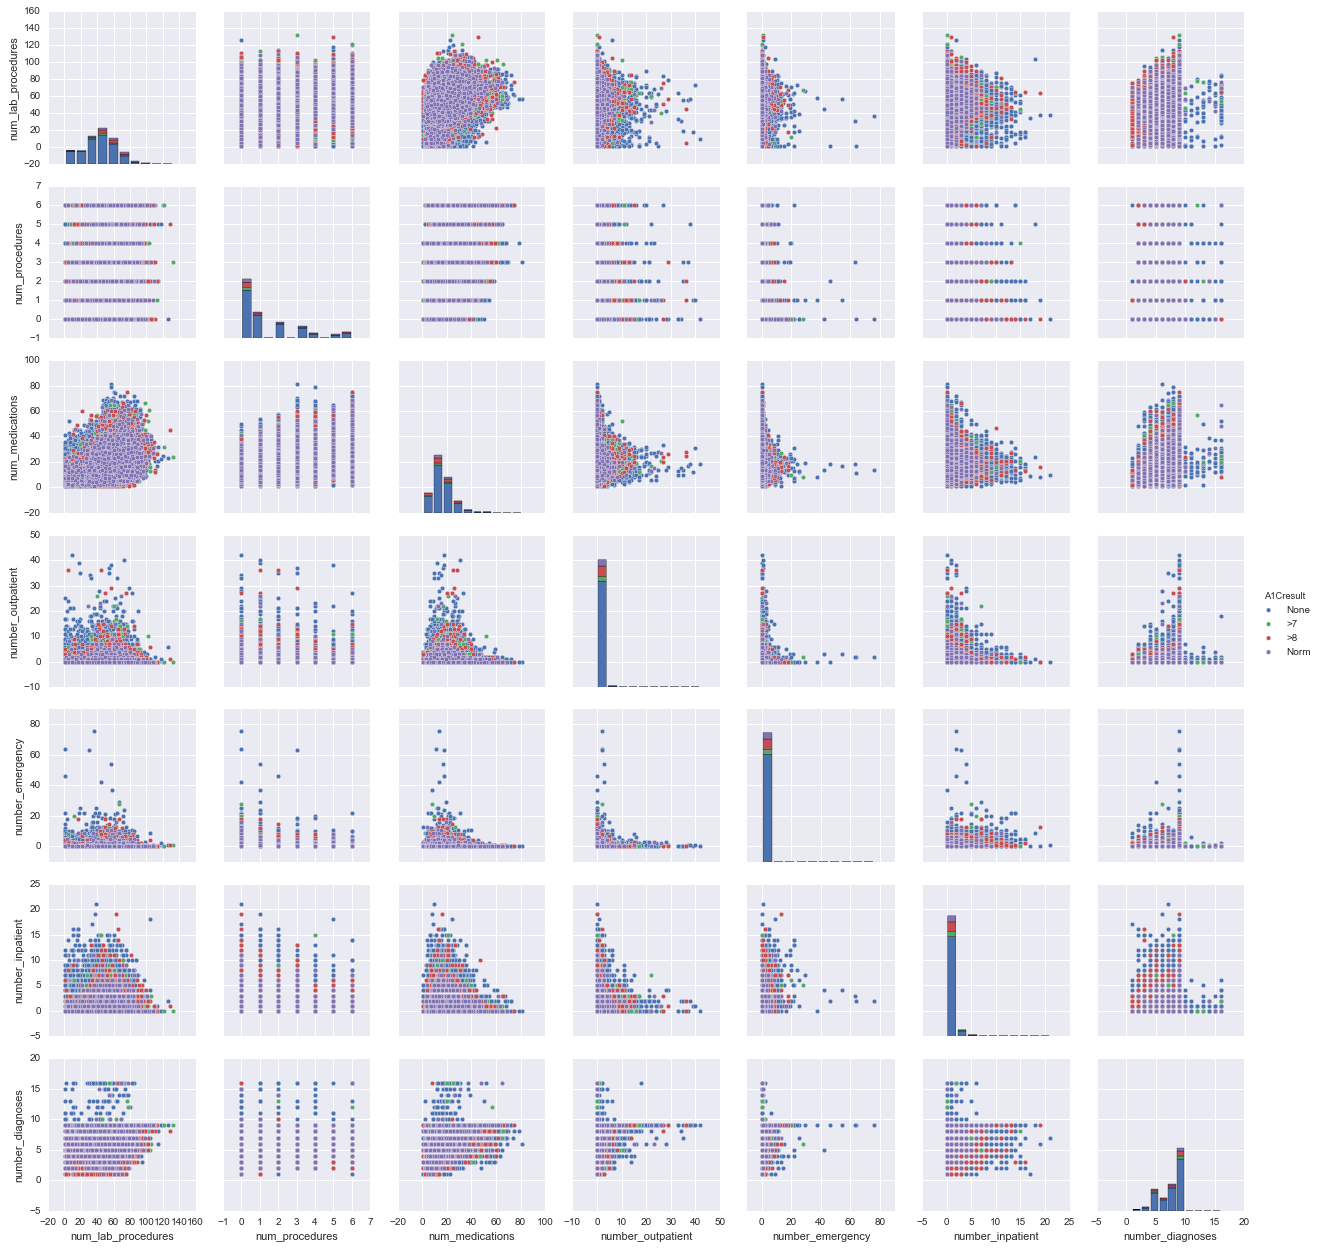

In [130]:
sns.pairplot(data2[['num_lab_procedures','num_procedures','num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient','number_diagnoses','A1Cresult']],hue="A1Cresult")

получаем, что если не смотреть на None, то преобладают значения с результатом больше 8, в большинстве случаев это означает неконтролируемый диабет, но порой, такое возможно из-за расы пациента, по статистике высокие показатели тесты характерны для африканской расы и азиатов, но по данным этого не видно, нет четкой зависимости между результатом теста и расой

In [135]:
 pd.crosstab(data2.race,data2.A1Cresult)

A1Cresult,>7,>8,None,Norm
race,,,,
?,82,255,1851,85
AfricanAmerican,559,1845,15700,1106
Asian,36,62,506,37
Caucasian,2967,5639,63944,3549
Hispanic,98,265,1546,128
Other,70,150,1201,85


Первичные выводы:

    1) в данных много пропущенных значений с котрыми придется иметь дело и либо восстанавливать либо полность выкидывать переменную, как в случаес с weight (больше 95%)
    2) Слишком много людей с категорией NO в признаке readmitted, из-за чего придется оъединить меньше/больше 30 для классификации
    3) Есть более 20 признаков про лекарства от диабета, выкидывать их не хочется, поэтому буду группировать по силе воздействия и по тому что происходило с дозой (уменьшалась, увеличивалась), а также по числу ликарств от диабета, так как некоторые больные принимают несколько препаратов